In [91]:
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_histogram_image(img, L, mask=None):
  histogram_list = []
  
  if img.ndim == 2:
    range_ = 1
  else:
    range_ = 3

  for i in range(range_):
    histogram = cv2.calcHist([img], [i], mask, [L], [0, L]) 
    histogram_list.append(histogram)
  
  return histogram_list


def equalize_hist(image):
  equalized_image = cv2.equalizeHist(image)
  return equalized_image

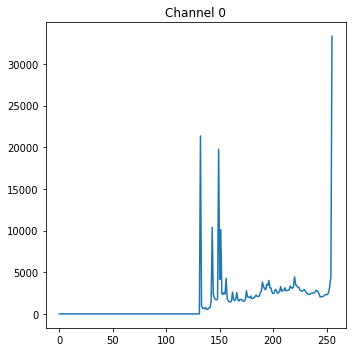

In [92]:
image = cv2.imread('img.png', 0)

histogram_list = get_histogram_image(image, L=256, mask=None)

for i in range(len(histogram_list)):
  plt.figure(figsize=(5, 5))
  plt.title(f'Channel {i}')
  plt.plot(histogram_list[i])
  print("\n")

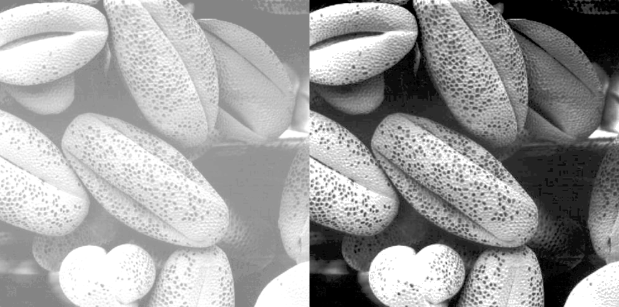

In [93]:
# Histogram Equalization

equalized_image = equalize_hist(image)

result = np.hstack((image, equalized_image))
result = cv2.resize(result, (0,0), fx=0.5, fy=0.5) 

from google.colab.patches import cv2_imshow

cv2_imshow(result)

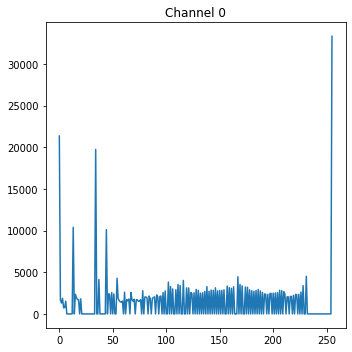

In [94]:
# Let's show the equalized histogram

histogram_list = get_histogram_image(equalized_image, L=256, mask=None)

for i in range(len(histogram_list)):
  plt.figure(figsize=(5, 5))
  plt.title(f'Channel {i}')
  plt.plot(histogram_list[i])
  print("\n")

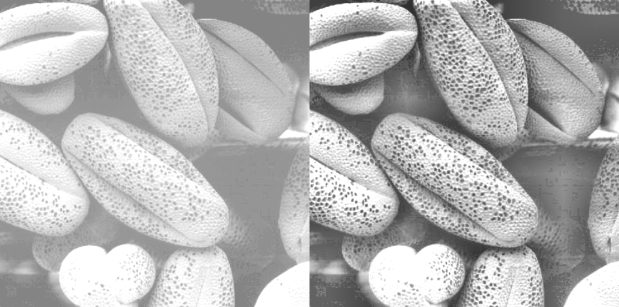

In [97]:
# Adaptive Histogram Equalization

clahe_object = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

adaptive_equalized_image = clahe_object.apply(image)

result = np.hstack((image, adaptive_equalized_image))
result = cv2.resize(result, (0,0), fx=0.5, fy=0.5) 

cv2_imshow(result)

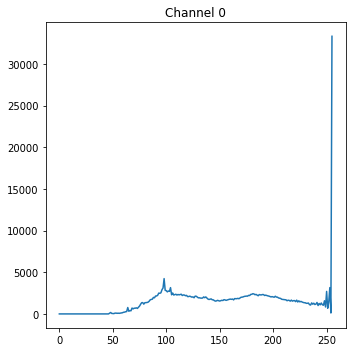

In [99]:
# Now, show the adaptive equalized histogram

histogram_list = get_histogram_image(adaptive_equalized_image, L=256, mask=None)

for i in range(len(histogram_list)):
  plt.figure(figsize=(5, 5))
  plt.title(f'Channel {i}')
  plt.plot(histogram_list[i])
  print("\n")